In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
import os
os.listdir()

['load_images.py',
 'create_population_dict.ipynb',
 'structure_dict.pickle',
 'NevadaStructureLongLatUSDA.pickle',
 'get_population_data.py',
 'Polygon.ipynb',
 'us-county-boundaries-santa-clara.json',
 'SantaClaraStructureLongLatUSDA.pickle',
 'santa_clara_fuel_radii.pickle',
 'ranking.pickle',
 'api_results',
 '.DS_Store',
 'fuel_radii.pickle',
 'CaliforniaPopulationLongLat.pickle',
 'gdal-3.3.1',
 'Updated Reverse Geocoding.ipynb',
 'santa_clara_structure_dataframe.pickle',
 'SantaClaraFuelLongLat.pickle',
 'us-county-boundaries-nevada.csv',
 'product_dataframe.pickle',
 'import numpy as np',
 'create_usda_structure_dict.ipynb',
 'CA',
 'MariposaMaps',
 'Nevada County Structure Heatmap.pdf',
 'NevadaMaps',
 'us-county-boundaries-nevada.json',
 'santa_clara_structure_dict.pickle',
 'create_wind_dict.ipynb',
 'california_population_dataframe.pickle',
 'env',
 'gpw_v4_population_density_adjusted_to_2015_unwpp_country_totals_rev11_2020_30_sec.tif',
 'geckodriver',
 'radii_ranking.pickl

In [3]:
import pickle
pickle_in = open("SantaClaraStructureLongLatUSDA.pickle","rb")
d = pickle.load(pickle_in)

In [4]:
keys = list(d.keys())

In [15]:
i = 0
j = 0
first_lat = keys[0].split(", ")[0]
for key in keys:
    if key.split(", ")[0] == first_lat:
        j += 1
i = int(len(d) / j)

In [16]:
i, j

(2939, 2195)

In [5]:
vals = []
latitude = []
longitude = []

for key in keys:
    vals.append(d[key])
    latitude.append(key.split(", ")[0])
    longitude.append(key.split(", ")[1])

In [6]:
import pandas as pd

# initialise data of lists.
data = {'Vals': vals,
		'Latitude':latitude,
        'Longitude':longitude}

# Creates pandas DataFrame.
df = pd.DataFrame(data)

# print the data
df


,Vals,Latitude,Longitude
0,1364,37.48918273648376,-122.20141728528922
1,1131,37.48918273648376,-122.2010876920423
2,0,37.48918273648376,-122.20075809814858
3,0,37.48918273648376,-122.20042850360808
4,591,37.48918273648376,-122.2000989084208
...,...,...,...
6451100,0,36.73199655420715,-121.21362988371204
6451101,0,36.73199655420715,-121.21330199341523
6451102,0,36.73199655420715,-121.21297410250362
6451103,0,36.73199655420715,-121.21264621097725


In [ ]:
# df = pd.read_pickle("california_population_dataframe.pickle")

In [8]:
list(df['Vals'])

[1364,
 1131,
 0,
 0,
 591,
 459,
 407,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -2147483648,
 -2147483648,
 -2147483648,
 -2147483648,
 -2147483648,
 -2147483648,
 -2147483648,
 -2147483648,
 -2147483648,
 -2147483648,
 -214748

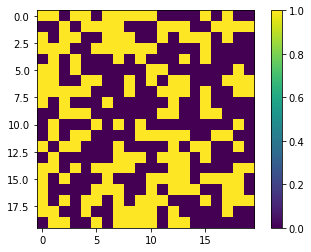

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#===Load Data===#
x,y  = np.meshgrid(np.arange(20),np.arange(20) )
data = np.random.randint(0,2, size=(20,20))

#===Plot===#
plt.subplot(111)
plt.imshow(data, interpolation="None")
plt.colorbar()
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
x = list(df['Longitude'])
y = list(df['Latitude'])
data = list(df['Vals'])
data = np.array(data)
data = np.reshape(data, (i, j))

In [18]:
data.shape

(2939, 2195)

In [ ]:
list(data[0]).count(-1)

In [28]:
max(df['Vals'])

13902

In [34]:
plt.imshow(data, interpolation="None", vmin=-300, vmax=4000)
plt.colorbar()
plt.show()


In [ ]:
x[0], y[0], data[0]

In [21]:
%matplotlib auto

Using matplotlib backend: MacOSX


In [ ]:
plt.savefig('nevada_structure_heatmap.png')